# Music & Mental Health
### Intro
Dataset is from Music & Mental Health Survey Results on Kaggle, which reports results on preference of different music genres and self-reported mental health conditions (anxiety, depression, insomnia and obsessive-compulsive disorder).

Due to personal interest on music therapy, I was curious to see if there were any potential correlations between music preference and self-reported mental health conditions. However, due to the survey being self-reported, especially in terms of the mental health conditions, this might not be an accurate observation as we are not sure whether the respondents have actually been officially diagnosed with those mental health conditions. Besides that, the usage of a numeric rating scale (from 0-10) for self-reported mental health conditions has certain limitations, e.g. respondents might differ in subjective views on severity despite providing similar ratings. Regardless, this dataset was able to provide preliminary insights towards how one's mental health might be affected by/affecting one's preference in music, opening possibilities to deep dive into this topic and inform future approaches in music therapy.

### Context
Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.

The dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.
### Interpreting data
Block 0: Background
Respondents answer generic questions focused on musical background and listening habits.

Block 1: Music genres
Respondents rank how often they listen to 16 music genres, where they can select:

Never
Rarely
Sometimes
Very frequently
Block 2: Mental health
Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:

0 - I do not experience this.
10 - I experience this regularly, constantly/or to an extreme.
Additional data that does not fall in these blocks may provide useful background information. See column descriptors.

### What is Anxiety?
Anxiety is a feeling of unease, such as worry or fear, that can be mild or severe. Everyone has feelings of anxiety at some point in their life. For example, you may feel worried and anxious about sitting an exam, or having a medical test or job interview.
### What is Depression?
Depression is a mental health condition that affects a person's mood, thoughts, and behavior. It's more than just feeling sad or going through a rough patch; it's a persistent feeling of sadness, loss of interest or pleasure in activities, and can affect various aspects of life.
### What is insomnia? 
Insomnia is when you aren't sleeping as you should. That can mean you aren't sleeping enough, you aren't sleeping well or you're having trouble falling or staying asleep. For some people, insomnia is a minor inconvenience. For others, insomnia can be a major disruption.
### What is OCD?
Obsessive-Compulsive Disorder is a mental health condition characterized by recurring, unwanted thoughts (obsessions) and repetitive behaviors or mental acts (compulsions) that an individual feels driven to perform.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data = pd.read_excel('Music.xlsx')

In [63]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [64]:
data.shape

(736, 33)

In [65]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [66]:
columns_to_drop = [0,2,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,32]
data.drop(data.columns[columns_to_drop], axis=1, inplace=True)

In [67]:
data.isnull().sum()

Age                1
Hours per day      0
While working      3
Instrumentalist    4
Composer           1
Anxiety            0
Depression         0
Insomnia           0
OCD                0
Music effects      8
dtype: int64

In [68]:
# Removing rows with missing values across the entire DataFrame
data.dropna(inplace=True)

In [69]:
data.shape

(722, 10)

In [70]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,4.0,No,No,No,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,No,Yes,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,No,No,7.0,2.0,5.0,9.0,Improve
5,18.0,5.0,Yes,Yes,Yes,8.0,8.0,7.0,7.0,Improve
6,18.0,3.0,Yes,Yes,No,4.0,8.0,6.0,0.0,Improve


In [71]:
data.columns = data.columns.str.strip()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 2 to 735
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              722 non-null    float64
 1   Hours per day    722 non-null    float64
 2   While working    722 non-null    object 
 3   Instrumentalist  722 non-null    object 
 4   Composer         722 non-null    object 
 5   Anxiety          722 non-null    float64
 6   Depression       722 non-null    float64
 7   Insomnia         722 non-null    float64
 8   OCD              722 non-null    float64
 9   Music effects    722 non-null    object 
dtypes: float64(6), object(4)
memory usage: 62.0+ KB


In [73]:
data['Age'] = data['Age'].astype(int)
data['Anxiety'] = data['Anxiety'].astype(int)
data['Depression'] = data['Depression'].astype(int)
data['Insomnia'] = data['Insomnia'].astype(int)
data['OCD'] = data['OCD'].astype(int)
data['Hours per day'] = data['Hours per day'].astype(int)

In [74]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
2,18,4,No,No,No,7,7,10,2,No effect
3,61,2,Yes,No,Yes,9,7,3,3,Improve
4,18,4,Yes,No,No,7,2,5,9,Improve
5,18,5,Yes,Yes,Yes,8,8,7,7,Improve
6,18,3,Yes,Yes,No,4,8,6,0,Improve


# EDA

## Univariate

<Axes: ylabel='count'>

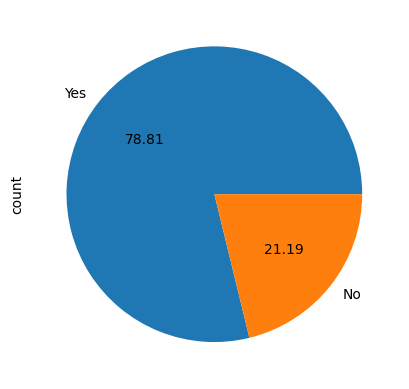

In [75]:
data['While working'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

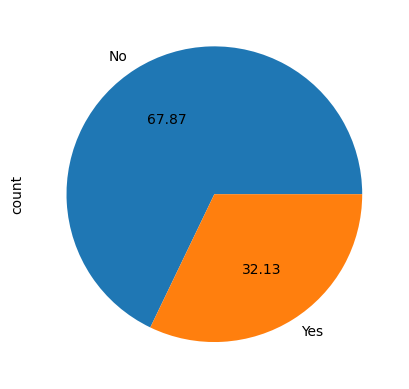

In [76]:
data['Instrumentalist'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

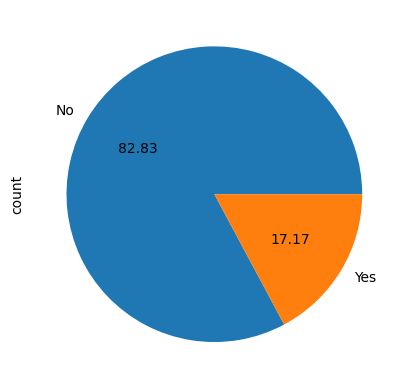

In [77]:
data['Composer'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

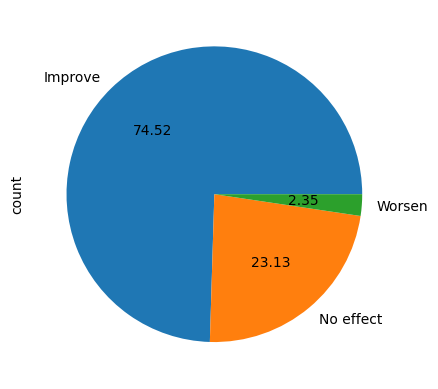

In [78]:
data['Music effects'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 49., 284., 167.,  89.,  46.,  21.,  13.,   9.,  14.,  13.,   8.,
          6.,   1.,   1.,   1.]),
 array([10.        , 15.26666667, 20.53333333, 25.8       , 31.06666667,
        36.33333333, 41.6       , 46.86666667, 52.13333333, 57.4       ,
        62.66666667, 67.93333333, 73.2       , 78.46666667, 83.73333333,
        89.        ]),
 <BarContainer object of 15 artists>)

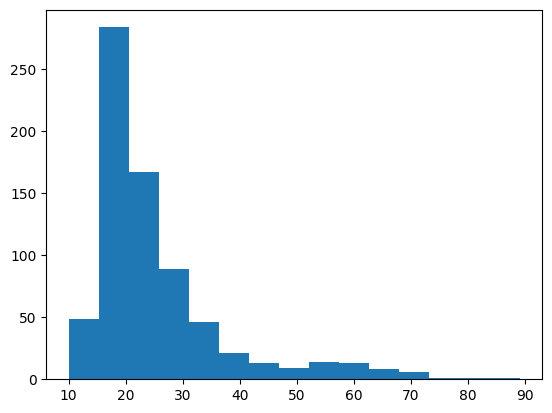

In [79]:
plt.hist(data['Age'],bins=15)

<Axes: xlabel='Age'>

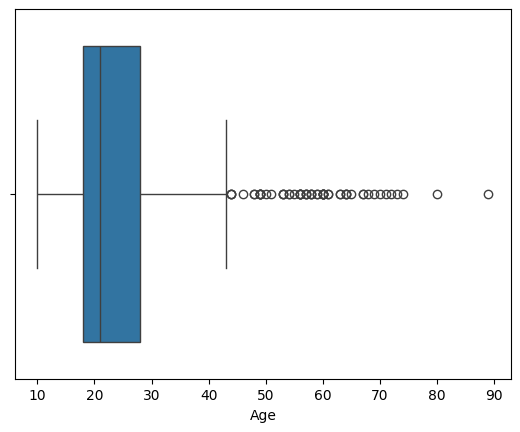

In [80]:
sns.boxplot(data,x='Age')

In [81]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
2,18,4,No,No,No,7,7,10,2,No effect
3,61,2,Yes,No,Yes,9,7,3,3,Improve
4,18,4,Yes,No,No,7,2,5,9,Improve
5,18,5,Yes,Yes,Yes,8,8,7,7,Improve
6,18,3,Yes,Yes,No,4,8,6,0,Improve


(array([337., 199., 116.,  32.,  21.,   9.,   3.,   1.,   1.,   3.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

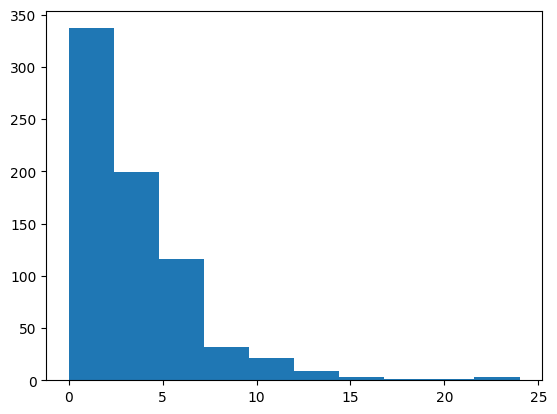

In [82]:
plt.hist(data['Hours per day'],bins=10)

<Axes: xlabel='Hours per day'>

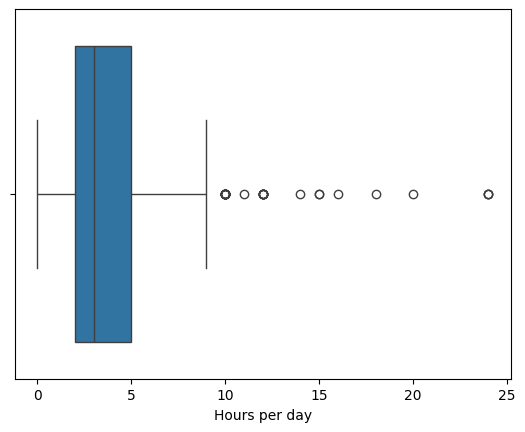

In [83]:
sns.boxplot(data, x = 'Hours per day')

In [84]:
# Counting the number of ages greater than 45
hours_greater_than_10 = data[data['Hours per day'] > 10]['Hours per day'].count()

print(f"Number of hours greater than 10: {hours_greater_than_10}")


Number of hours greater than 10: 18


In [85]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
2,18,4,No,No,No,7,7,10,2,No effect
3,61,2,Yes,No,Yes,9,7,3,3,Improve
4,18,4,Yes,No,No,7,2,5,9,Improve
5,18,5,Yes,Yes,Yes,8,8,7,7,Improve
6,18,3,Yes,Yes,No,4,8,6,0,Improve


(array([ 34.,  29.,  44.,  65.,  55.,  59.,  83., 121., 113., 119.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

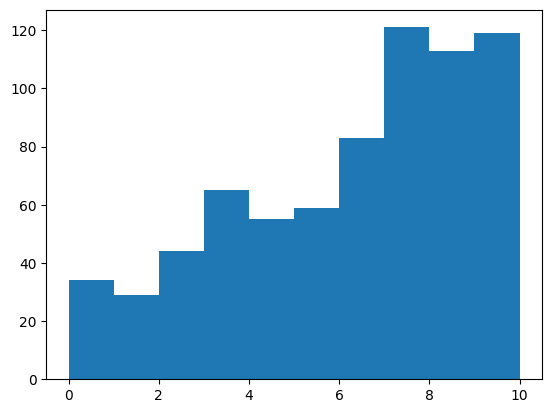

In [86]:
plt.hist(data['Anxiety'],bins=10)

<Axes: xlabel='Anxiety'>

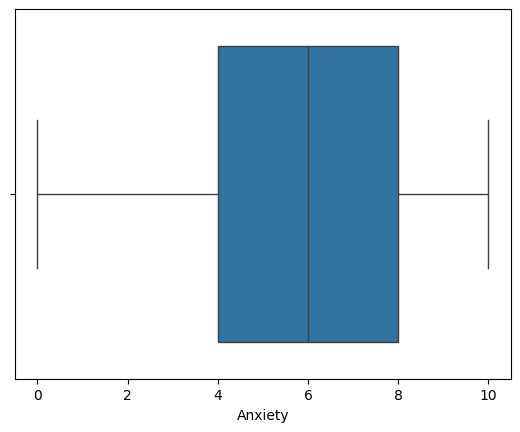

In [87]:
sns.boxplot(data, x = 'Anxiety')

In [88]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
2,18,4,No,No,No,7,7,10,2,No effect
3,61,2,Yes,No,Yes,9,7,3,3,Improve
4,18,4,Yes,No,No,7,2,5,9,Improve
5,18,5,Yes,Yes,Yes,8,8,7,7,Improve
6,18,3,Yes,Yes,No,4,8,6,0,Improve


### Numerical Categorical

<Axes: xlabel='Music effects', ylabel='Hours per day'>

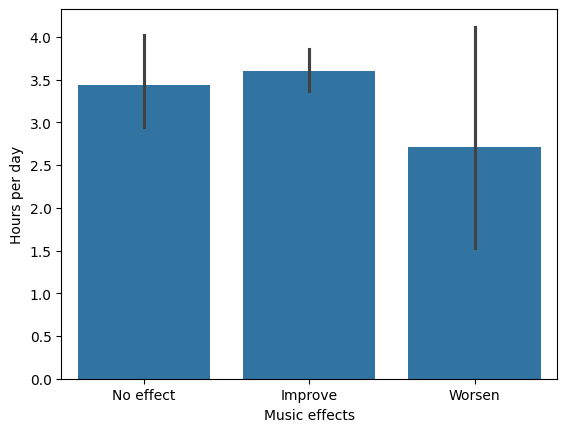

In [89]:
sns.barplot(y='Hours per day',x='Music effects',data=data)

# Removing Outliers

<Axes: xlabel='Age'>

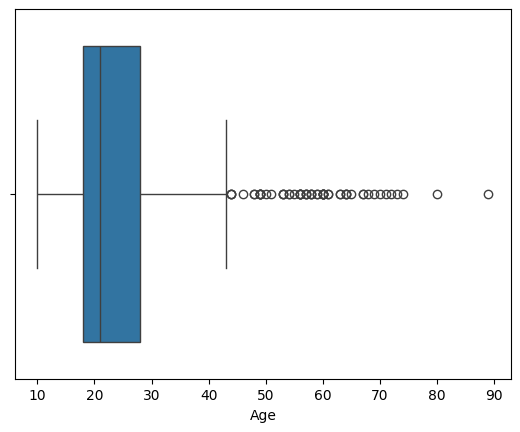

In [90]:
sns.boxplot(data,x='Age')

/var/folders/y3/4xy1crns1y5_qhxhtggw6l2c0000gn/T/ipykernel_13894/661701847.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True)


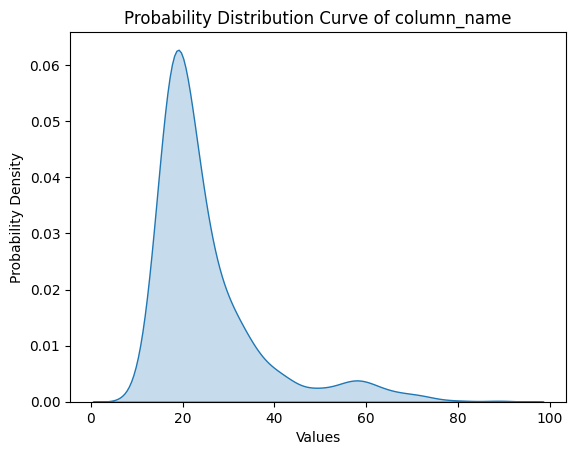

In [91]:
# Plotting the probability distribution curve
sns.kdeplot(data['Age'], shade=True)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Curve of column_name')
plt.show()

In [92]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
data = data[(data['Age'] >= (Q1 - 1.5 * IQR)) & (data['Age'] <= (Q3 + 1.5 * IQR))]

In [93]:
data.shape

(665, 10)

/var/folders/y3/4xy1crns1y5_qhxhtggw6l2c0000gn/T/ipykernel_13894/661701847.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True)


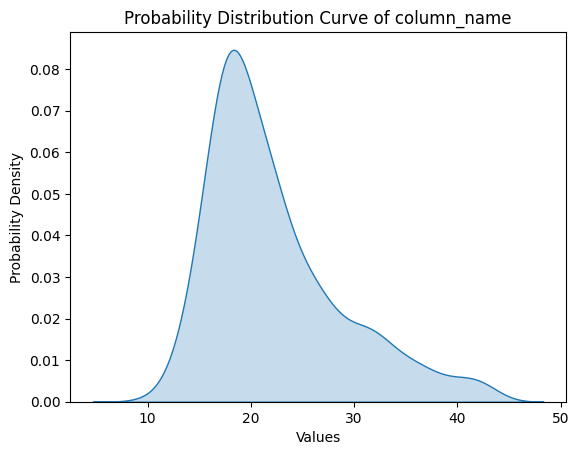

In [94]:
# Plotting the probability distribution curve
sns.kdeplot(data['Age'], shade=True)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Curve of column_name')
plt.show()

/var/folders/y3/4xy1crns1y5_qhxhtggw6l2c0000gn/T/ipykernel_13894/69313315.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Hours per day'], shade=True)


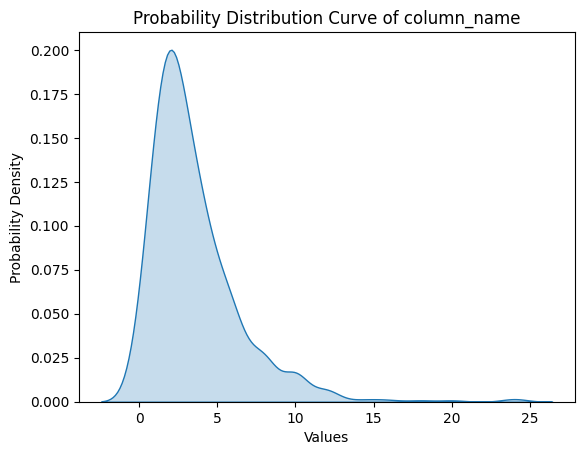

In [95]:
# Plotting the probability distribution curve
sns.kdeplot(data['Hours per day'], shade=True)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Curve of column_name')
plt.show()

In [96]:
Q1 = data['Hours per day'].quantile(0.25)
Q3 = data['Hours per day'].quantile(0.75)
IQR = Q3 - Q1

# Filtering values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
data = data[(data['Hours per day'] >= (Q1 - 1.5 * IQR)) & (data['Hours per day'] <= (Q3 + 1.5 * IQR))]

/var/folders/y3/4xy1crns1y5_qhxhtggw6l2c0000gn/T/ipykernel_13894/69313315.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Hours per day'], shade=True)


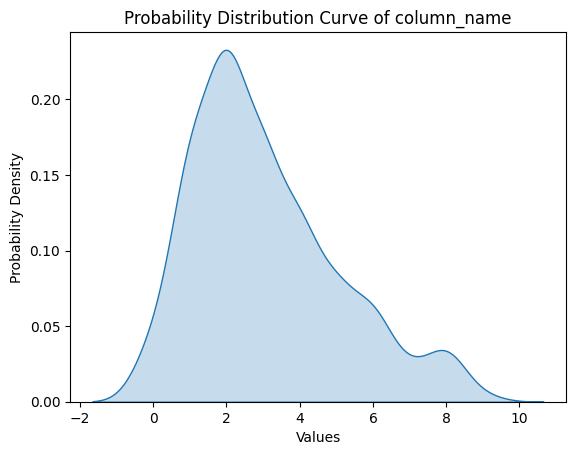

In [97]:
# Plotting the probability distribution curve
sns.kdeplot(data['Hours per day'], shade=True)
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Curve of column_name')
plt.show()

In [98]:
data.shape

(630, 10)

# Now Lets Handle Categorical Values

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Anxiety,Depression,Insomnia,OCD,Music effects
2,18,4,No,No,No,7,7,10,2,No effect
4,18,4,Yes,No,No,7,2,5,9,Improve
5,18,5,Yes,Yes,Yes,8,8,7,7,Improve
6,18,3,Yes,Yes,No,4,8,6,0,Improve
7,21,1,Yes,No,No,5,3,5,3,Improve


In [101]:
# While Working,Instrumentalist and	Composer -> One Hot Encoding
# Music Effects -> Label Encoding

In [102]:
y = data['Music effects']
X = data.dropna(subset=['Music effects'])

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming 'X' and 'y' are your original features and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable with LabelEncoder
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

# Define the ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse=False, drop='first'), ['While working', 'Instrumentalist', 'Composer']),
    ('trf2',OrdinalEncoder(categories=[['Worsen','Improve','No effect']]),['Music effects'])
], remainder='passthrough')

# Fit and transform the training set
X_train_transformed = transformer.fit_transform(X_train)

# Transform the testing set
X_test_transformed = transformer.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_transformed, y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = logistic_model.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9841
Precision: 0.9845
Recall: 0.9841
F1 Score: 0.9802
Confusion Matrix:
[[86  0  0]
 [ 0 37  0]
 [ 2  0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      1.00      1.00        37
           2       1.00      0.33      0.50         3

    accuracy                           0.98       126
   macro avg       0.99      0.78      0.83       126
weighted avg       0.98      0.98      0.98       126



In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize classifiers
classifiers = {
    'Logistic Regression': logistic_model,
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train
    clf.fit(X_train_transformed, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_transformed)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print results
    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(class_report)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.9841
Precision: 0.9845
Recall: 0.9841
F1 Score: 0.9802
Confusion Matrix:
[[86  0  0]
 [ 0 37  0]
 [ 2  0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      1.00      1.00        37
           2       1.00      0.33      0.50         3

    accuracy                           0.98       126
   macro avg       0.99      0.78      0.83       126
weighted avg       0.98      0.98      0.98       126


Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[86  0  0]
 [ 0 37  0]
 [ 0  0  3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00         3

    accuracy                           1.00       126
   macro avg       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(